In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import geopandas as gpd
import pickle
import numpy as np
import seaborn as sns

In [53]:
with open('Total.pickle', 'rb') as handle:
    all_cities = pickle.load(handle)

In [54]:
all_cities = all_cities[all_cities['flow'].notna()]

In [10]:
#all_cities = all_cities.fillna(0)

In [58]:
all_cities = all_cities[['station', 'cycleway', 'footway', 'pedestrian', 'flow', 'City']]

In [59]:
grouped_cities = all_cities.groupby('City').mean()

In [60]:
grouped_cities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, frankfurt to zurich
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station     5 non-null      float64
 1   cycleway    5 non-null      float64
 2   footway     5 non-null      float64
 3   pedestrian  5 non-null      float64
 4   flow        5 non-null      float64
dtypes: float64(5)
memory usage: 240.0+ bytes


In [30]:
citylist = ['Munich', 'Rotterdam-Hague', 'Frankfurt', 'Hamburg', 'Zurich']
UrbanTypo = pd.read_excel('Data/FINAL-COMBINED-DATASET.xlsx')
Cities = UrbanTypo.loc[(UrbanTypo.City.isin(citylist))]
Cities.reset_index(inplace = True)
Cities.head()

,index,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
0,98,Hamburg,99,9,MassTransit Heavyweight,Germany,42.00,18.00,12,28.00,...,0.016812,0.667477,0.273596,0.437481,0.747204,0.536597,0.035424,0.357805,0.313441,0.231415
1,99,Munich,100,9,MassTransit Heavyweight,Germany,37.00,21.00,14,28.00,...,0.021030,0.674947,0.142531,0.433690,0.779353,0.599366,0.033533,0.354032,0.236366,0.429755
2,101,Frankfurt,102,10,MassTransit Moderate,Germany,38.00,20.00,11,31.00,...,0.033763,0.080828,0.131759,0.403807,0.741574,0.625617,0.044672,0.323014,0.323657,0.342305
3,182,Rotterdam-Hague,183,10,MassTransit Moderate,Netherlands,49.00,17.00,16,18.00,...,NaN,0.356458,0.164029,0.484939,0.750362,0.540186,0.035450,0.204339,0.193488,0.508605
4,238,Zurich,239,10,MassTransit Moderate,Switzerland,42.92,46.31,4.14,5.65,...,0.025206,0.090735,0.346604,0.163072,1.000000,0.575431,0.025346,0.388853,0.185876,0.453369


In [31]:
for i in Cities.columns:
    print(i)

index
City
cityID
clusterID
Typology
Country
Car Modeshare (%)
Public Transit Modeshare (%)
Bicycle Modeshare (%)
Walking Modeshare (%)
Gasoline Pump Price (USD/liter)
Road Deaths Rate (per 1000)
Subway Length (km)
Subway Length Density (per km)
Subway Stations per Hundred Thousand
Subway Ridership per Capita
Subway Age (years)
BRT Length (km)
BRT System Length Density (per km)
BRT Stations per Hundred Thousand Persons
BRT Fleet per Hundred Thousand Persons
BRT Annual Ridership per Capita
BRT Age (years)
Bikeshare Stations
Bikeshare Stations per Hundred Thousand Persons
Bikeshare Number of Bikes
Bikeshare Bicycles per Hundred Thousand Persons
Bikeshare Age (years)
Congestion (%)
Congestion AM Peak (%)
Congestion PM Peak (%)
Traffic Index
Travel Time Index
Inefficiency Index
Population
Land Area (sq. km)
Population Density (per sq. km)
Population Change 1990 – 2000
Population Change 2000 – 2010
Population Change 2010 – 2020
Population Change 2020 – 2025
Urbanization Rate 2015 (%)
Urbani

After inspecting columns, sustainability appears to be expressed by the factors on a logical and comparable scale. Those are therefore chosen to be aggegrated. Let's subset those columns.

In [32]:
Cities_for_pca=Cities.iloc[:,70:79]
Cities_for_pca.head()

,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
0,0.667477,0.273596,0.437481,0.747204,0.536597,0.035424,0.357805,0.313441,0.231415
1,0.674947,0.142531,0.433690,0.779353,0.599366,0.033533,0.354032,0.236366,0.429755
2,0.080828,0.131759,0.403807,0.741574,0.625617,0.044672,0.323014,0.323657,0.342305
3,0.356458,0.164029,0.484939,0.750362,0.540186,0.035450,0.204339,0.193488,0.508605
4,0.090735,0.346604,0.163072,1.000000,0.575431,0.025346,0.388853,0.185876,0.453369


First we have to std the values https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [41]:
#standardize values
Cities_for_pca_std=Cities_for_pca

for i in range(len(Cities_for_pca.columns)):
    Cities_for_pca_std.iloc[:,i] = (Cities_for_pca.iloc[:,i] - Cities_for_pca.iloc[:,i].mean()) / Cities_for_pca.iloc[:,i].std()


In [47]:
cities_for_pca_std=grouped_cities

for i in range(len(grouped_cities.columns)):
    cities_for_pca_std.iloc[:,i] = (grouped_cities.iloc[:,i] - grouped_cities.iloc[:,i].mean()) / grouped_cities.iloc[:,i].std()


In [61]:
from sklearn import preprocessing
# Get column names first
names = grouped_cities.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(grouped_cities)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [62]:
grouped_cities.head()

,station,cycleway,footway,pedestrian,flow
City,,,,,
frankfurt,1.214286,1.223214,54.294643,1.973214,226.951107
hamburg,0.516746,3.447368,79.177033,7.459330,141.613203
munich,0.396154,7.700000,55.665385,1.882692,225.638097
rotterdam,0.185328,15.880309,21.660232,2.895753,260.080099
zurich,0.204902,2.983333,80.363725,3.173529,207.440305


In [76]:
pca = PCA(n_components=1) # we want 1 component
principalComponents = pca.fit_transform(grouped_cities)#lets fit

principalDf1 = pd.DataFrame(data = principalComponents
             , columns = ['Standardized aggegrated value'])
principalDf1['Standardized aggegrated value']

0   -14.444328
1    72.853864
2   -13.204283
3   -59.490759
4    14.285506
Name: Standardized aggegrated value, dtype: float64

In [70]:
eigenValues = pca.explained_variance_ratio_
eigenValues

array([0.92997462])

In [68]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1'], index=grouped_cities.feature_names)
loading_matrix

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [74]:
#What if we dont standardize?
pca = PCA(n_components=1) # we want 1 component
principalComponents = pca.fit_transform(grouped_cities)#lets fit

principalDf2 = pd.DataFrame(data = principalComponents
             , columns = ['Non standardized aggegrated value'])
principalDf2.head()

,Non standardized aggegrated value
0,-14.444328
1,72.853864
2,-13.204283
3,-59.490759
4,14.285506


<AxesSubplot:xlabel='Standardized aggegrated value', ylabel='Sustainability Factor'>

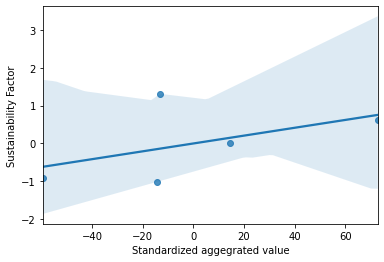

In [79]:
sns.regplot(x=principalDf1['Standardized aggegrated value'], y=Cities_for_pca['Sustainability Factor'] )

In [78]:
print(Cities_for_pca.columns)

Index(['Metro Propensity Factor', 'BRT Propensity Factor',
       'BikeShare Propensity Factor', 'Development Factor',
       'Sustainability Factor', 'Population Factor', 'Congestion Factor',
       'Sprawl Factor', 'Network Density Factor'],
      dtype='object')
